<a href="https://colab.research.google.com/github/dphi-official/Datathons/blob/master/Top_Notebook_Submissions/Data_Sprint/Data_Sprint_7/Rank_1_Ayush.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**<h1>Aayush Patni</h1>**

LinkedIn: https://linkedin.com/in/aayupatni

Link to DataSprint 7: https://dphi.tech/practice/challenge/36#

Read the dataset

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import pandas as pd
# train_df  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/bank_marketing_data/training_set_label.csv", sep=';')
train_df = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/bank_marketing_data/training_set_label.csv" )

In [ ]:
test_df=pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/bank_marketing_data/testing_set_label.csv')

In [ ]:
train_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribe
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


In [ ]:
print("Number of training examples: ", train_df.shape[0])
print("No of features: ",train_df.shape[1])

Number of training examples:  45211
No of features:  17


In [ ]:
test_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure
1,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other
2,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown
3,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown
4,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure


In [ ]:
print("No of test examples: ",test_df.shape[0])

No of test examples:  4509


Looking at some columns in the training data

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  subscribe  45211 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 5.9+ MB


In [ ]:
train_df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
subscribe    0
dtype: int64

In [ ]:
train_df['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [ ]:
train_df2=train_df.copy()
train_df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribe
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


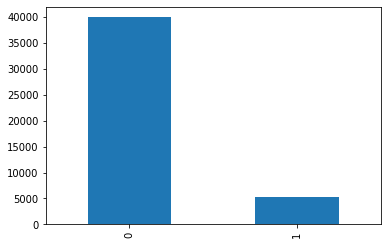

In [ ]:
train_df2['subscribe'].value_counts().plot(kind='bar')

Seems that given dataset is heavily imbalanced

In [ ]:
train_df2['month'].nunique()

12

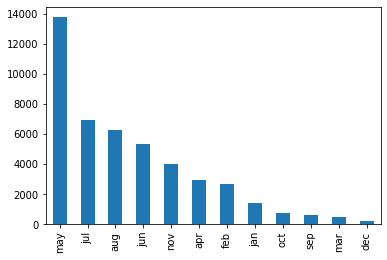

In [ ]:
train_df2['month'].value_counts().plot(kind='bar')

In [ ]:
train_df2['job'].nunique()

12

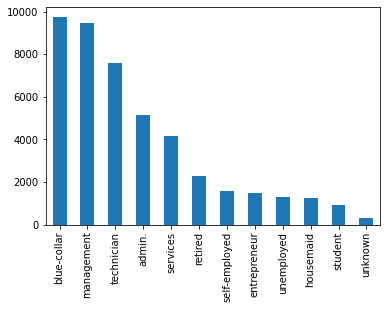

In [ ]:
train_df2['job'].value_counts().plot(kind='bar')

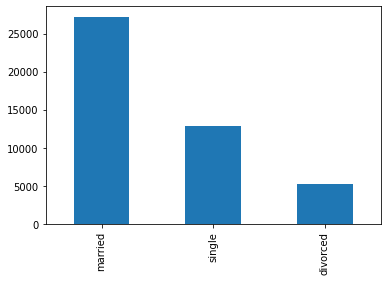

In [ ]:
train_df2['marital'].value_counts().plot(kind='bar')

In [ ]:
train_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  subscribe  45211 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 5.9+ MB


Prepare the dataset for training

1. Convert categorical columns into one hot encoded columns using get_dummies.

2. Split the dataset stratified on the classes so that our training and validation data contains same distribution of both classes.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Read the data
X = train_df2.copy()
X_test_full = test_df

# Remove rows with missing target, separate target from predictors
X.dropna(axis=0, subset=['subscribe'], inplace=True)
y = X.subscribe
X.drop(['subscribe'], axis=1, inplace=True)

# Break off validation set from training data
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,stratify=y,shuffle=True,
                                                                random_state=0)

# "Cardinality" means the number of unique values in a column
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
low_cardinality_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 15 and 
                        X_train_full[cname].dtype == "object"]

# Select numeric columns
numeric_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]

# Keep selected columns only
my_cols = low_cardinality_cols + numeric_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()
X_test = X_test_full[my_cols].copy()

# One-hot encode the data (to shorten the code, we use pandas)
X_train = pd.get_dummies(X_train)
X_valid = pd.get_dummies(X_valid)
X_test = pd.get_dummies(X_test)
X_train, X_valid = X_train.align(X_valid, join='left', axis=1)
X_train, X_test = X_train.align(X_test, join='left', axis=1)

In [ ]:
X_all=pd.concat([X_train,X_valid,X_test])
X_all.shape

(49720, 51)

In [ ]:
X_all.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
32213,35,1350,16,185,1,330,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
36907,59,145,12,556,2,287,13,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1447,53,1786,8,66,2,-1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
10973,37,1170,17,153,3,-1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
26982,46,829,21,81,7,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [ ]:
#Reduce colinear columns and dummy variable trap
cols_to_drop=['duration','job_unknown','marital_divorced','education_unknown','default_no','housing_no','loan_no','contact_unknown','month_dec','poutcome_unknown']
X_all.drop(columns=cols_to_drop,inplace=True)
X_all.shape

(49720, 41)

In [ ]:
X_all.head()

,age,balance,day,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_married,marital_single,education_primary,education_secondary,education_tertiary,default_yes,housing_yes,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success
32213,35,1350,16,1,330,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
36907,59,145,12,2,287,13,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1447,53,1786,8,2,-1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10973,37,1170,17,3,-1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
26982,46,829,21,7,-1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe28a8a4908>]],
      dtype=object)

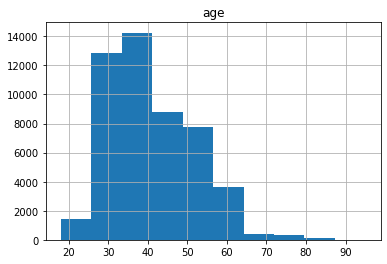

In [ ]:
X_all.hist('age')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe295de1438>]],
      dtype=object)

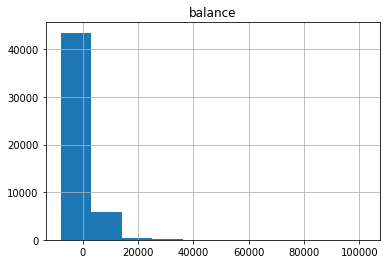

In [ ]:
X_all.hist('balance') #negative balance 

In [ ]:
X=X_all[:train_df2.shape[0]]
X_test=X_all[train_df2.shape[0]:]
X.shape, X_test.shape

((45211, 41), (4509, 41))

In [ ]:
y=pd.concat([y_train,y_valid])
y.shape

(45211,)

Selecting Baseline model and to deal with the imbalanced dataset, balanced class weights are used inside the classifier.

In [ ]:
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
# class_weights = class_weight.compute_class_weight('balanced', np.unique(y), y.values)
baseline = RandomForestClassifier(class_weight='balanced',random_state=42)
baseline.fit(X,y)
preds = baseline.predict(X)
print(classification_report(y,preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     39922
           1       1.00      1.00      1.00      5289

    accuracy                           1.00     45211
   macro avg       1.00      1.00      1.00     45211
weighted avg       1.00      1.00      1.00     45211



In [ ]:
preds = baseline.predict(X_test)

In [ ]:
preds.shape

(4509,)

In [ ]:
preds[0]

0

In [ ]:
res = pd.DataFrame(preds)
res.columns = ['prediction']

from google.colab import files
res.to_csv("submission_baseline.csv",index=False)
files.download("submission_baseline.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
res['prediction'].value_counts()

0    3990
1     519
Name: prediction, dtype: int64